 The <B> objective of this assignment </B> is to analyze and build models for Breast Cancer Classification using 
the data collected from fine needle aspiration. The dataset used in this assignment is publicly 
available to compute 10 features from each of the cell sample. It then calculates the mean value, 
extreme or worst value and standard error of each feature thus resulting in 30 real values attributes 

• <B> Methodology:</B> This problem/assignment belongs to the Classification problem where the output 
variable has to be categorized wither as a “B” or “M”. The 2 machine learning techniques applied for 
this are Logistic Regression and Decision Tree method. 

In [1]:
import pandas as pd

rawdata_df = pd.read_csv('Rawdata\Breast_cancer.csv')

# setting maximum number of columns in the display to be 50
pd.options.display.max_columns = 50

# To understand the metadata of the loaded data
rawdata_df.info()

# Checking the number of missing values in the available columns
rawdata_df.isna().sum()

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\HP\AppData\Local\Temp\ipykernel_17572\2071819331.py:3: SyntaxWarning: invalid escape sequence '\B'
  rawdata_df = pd.read_csv('Rawdata\Breast_cancer.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              565 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         0
diagnosis                  0
radius_mean                4
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    8
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               8
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [2]:
# making a copy from raw_data
updated_data = rawdata_df

# Filling the missing/empty cells with the median value of the respective columns
updated_data['radius_mean']=updated_data['radius_mean'].fillna(updated_data['radius_mean'].median())
updated_data['area_se']=updated_data['area_se'].fillna(updated_data['area_se'].median())
updated_data['radius_worst']=updated_data['radius_worst'].fillna(updated_data['radius_worst'].median())

# Checking the number of missing values again on the updated_data
updated_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
# importing labelEncoder for preprocessing
from sklearn.preprocessing import LabelEncoder
labelEncoder_diagnosis = LabelEncoder()

#using fit_transform function to replace the categorical values with corresponding numerical values
updated_data.diagnosis = labelEncoder_diagnosis.fit_transform(updated_data.diagnosis)

#verifying the transformation
updated_data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [4]:
# Analyzing the different values of diagnosis column which is the targeted feature for the given dataset
updated_data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

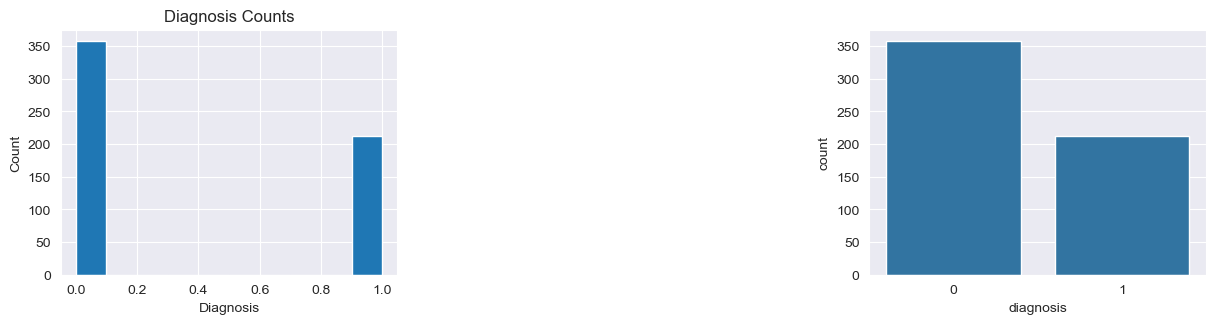

In [6]:
# Plotting graphs of number of occurrences of targeted feature
import seaborn as sns
import matplotlib.pyplot as plt

#
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize=(20, 7))
plt.subplot(2, 4, 2)
plt.hist(updated_data.diagnosis)

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Diagnosis Counts")
plt.subplot(2, 4, 4)
sns.countplot(x='diagnosis', data=updated_data) 
plt.show() 

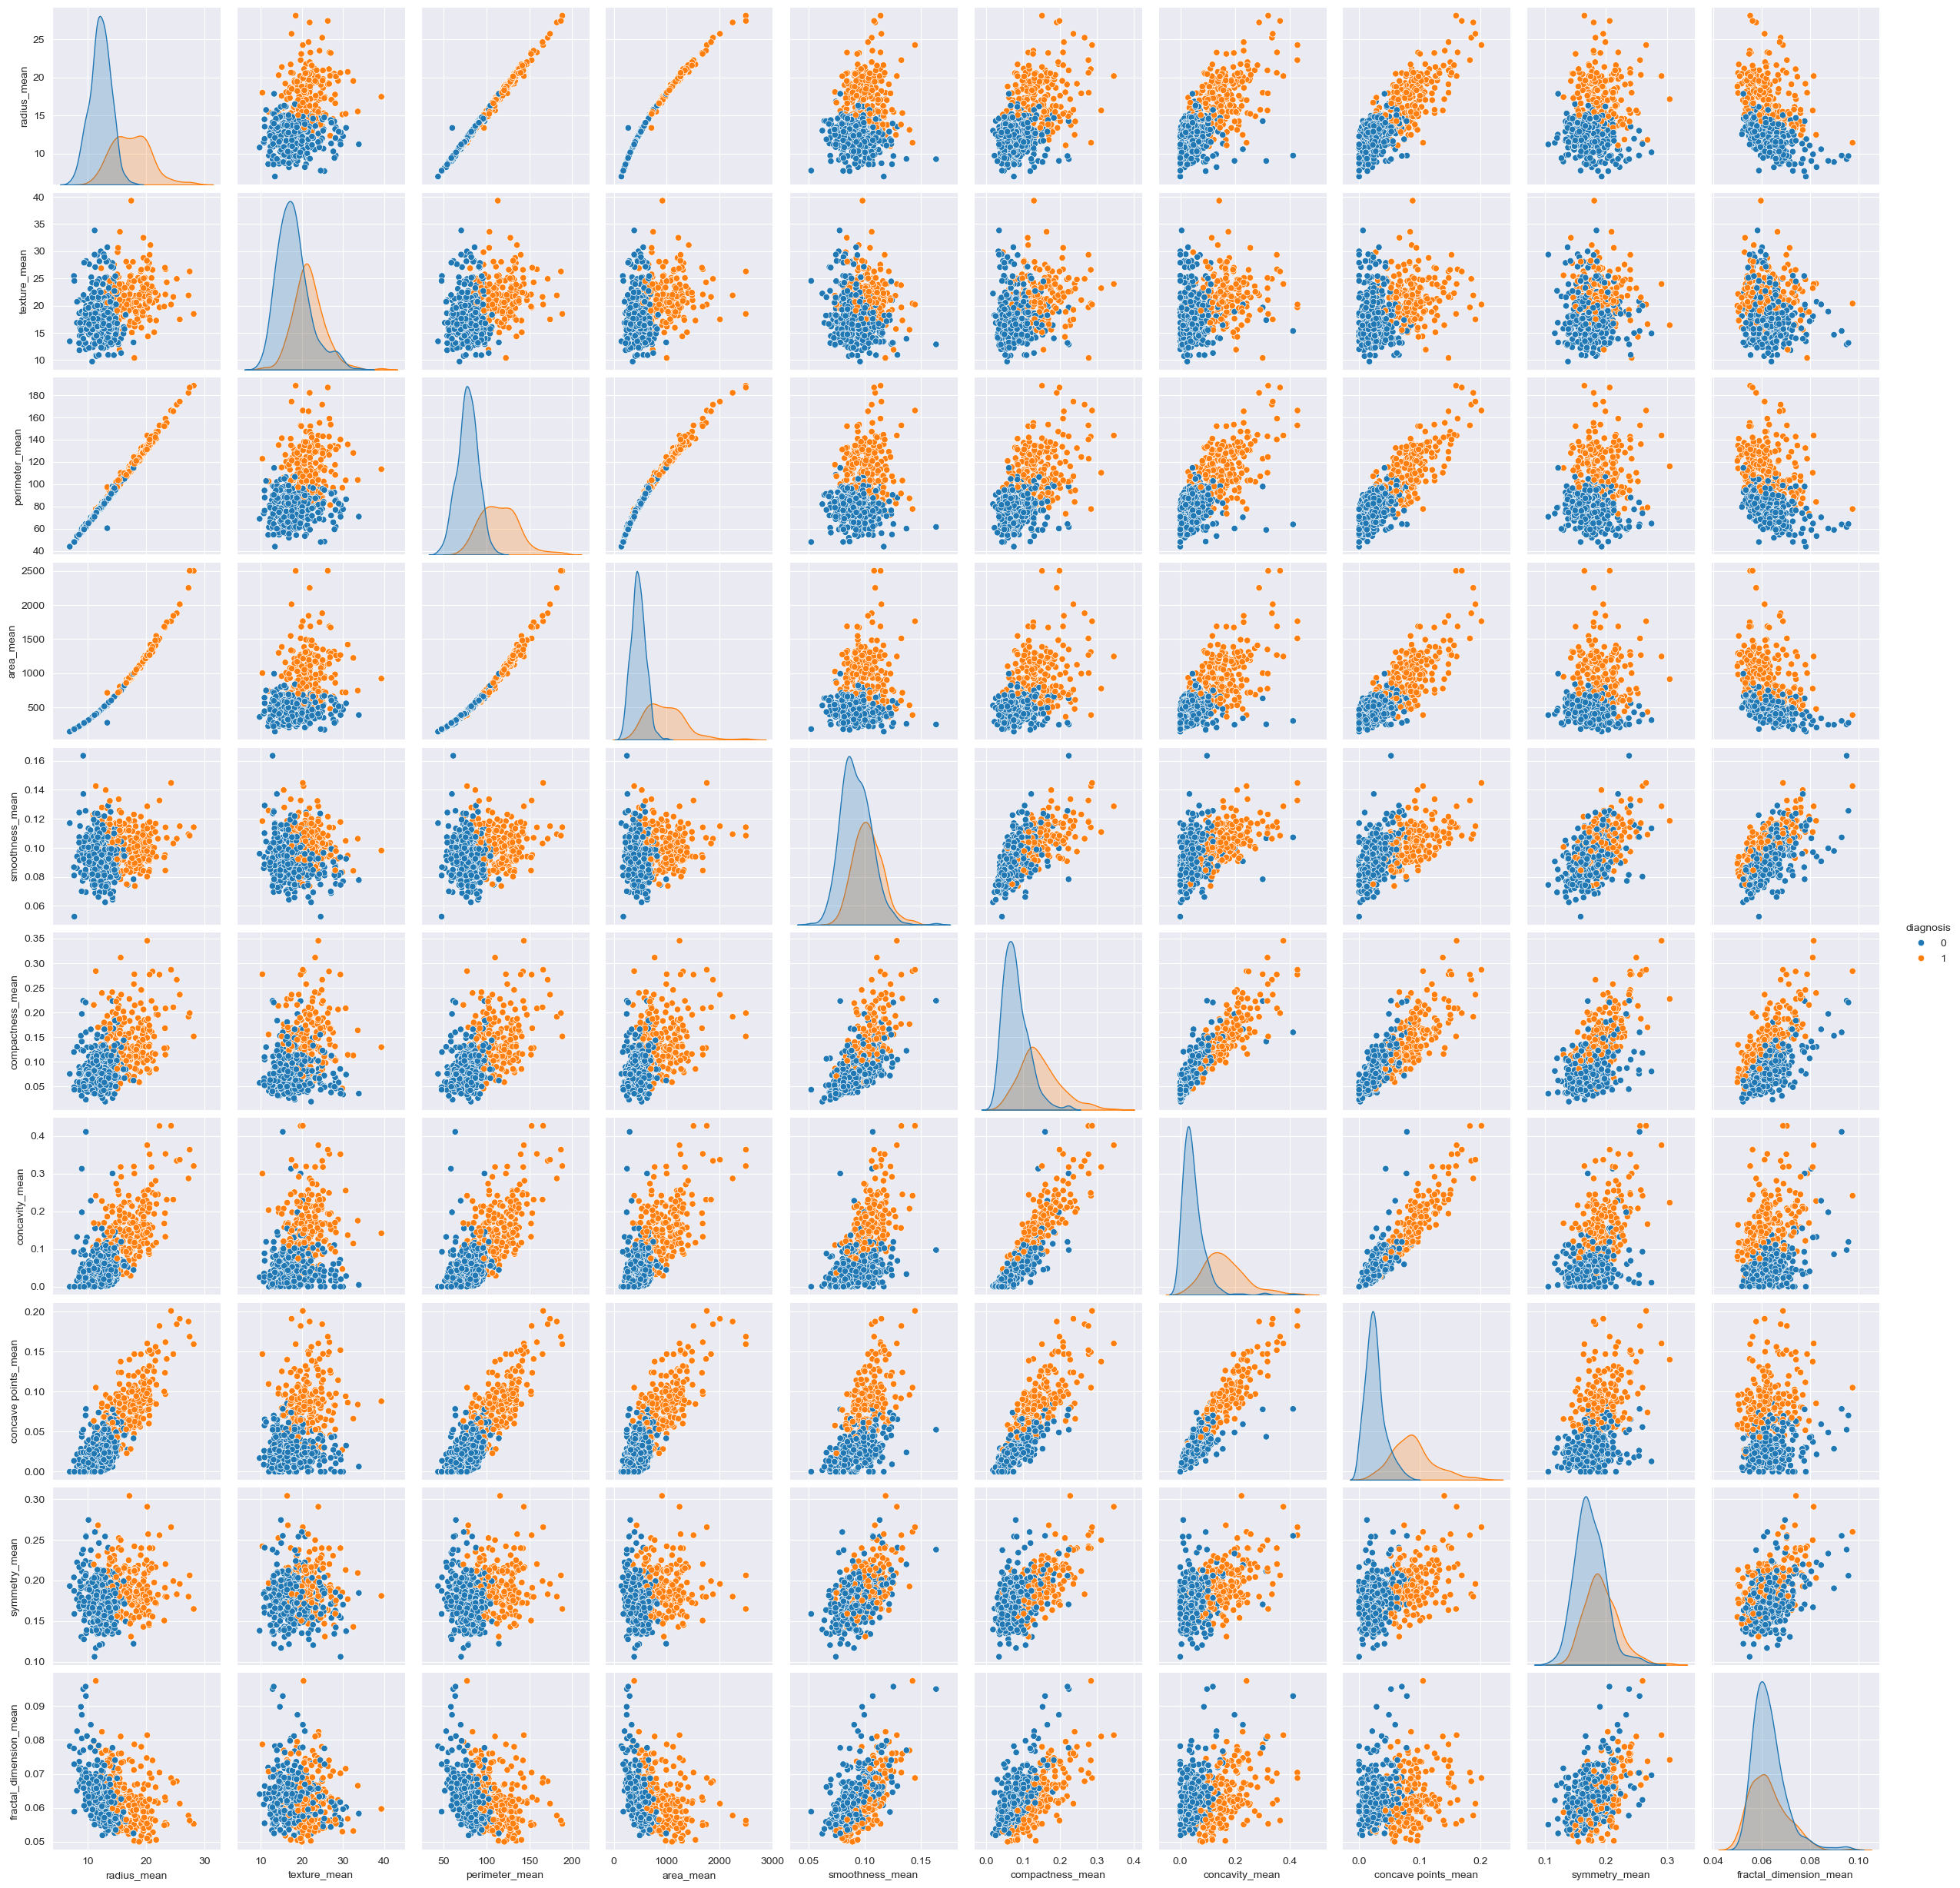

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.728712      0.415185        0.742636   
radius_mean              0.728712     1.000000      0.320741        0.996663   
texture_mean             0.415185     0.320741      1.000000        0.329533   
perimeter_mean           0.742636     0.996663      0.329533        1.000000   
area_mean                0.708984     0.986589      0.321086        0.986507   
smoothness_mean          0.358560     0.172419     -0.023389        0.207278   
compactness_mean         0.596534     0.506300      0.236702        0.556936   
concavity_mean           0.696360     0.676978      0.302418        0.716136   
concave points_mean      0.776614     0.822947      0.293464        0.850977   
symmetry_mean            0.330499     0.148993      0.071401        0.183027   
fractal_dimension_mean  -0.012838    -0.309388     -0.076437       -0.261477   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.708984         0.358560          0.596534   
radius_mean              0.986589         0.172419          0.506300   
texture_mean             0.321086        -0.023389          0.236702   
perimeter_mean           0.986507         0.207278          0.556936   
area_mean                1.000000         0.177028          0.498502   
smoothness_mean          0.177028         1.000000          0.659123   
compactness_mean         0.498502         0.659123          1.000000   
concavity_mean           0.685983         0.521984          0.883121   
concave points_mean      0.823269         0.553695          0.831135   
symmetry_mean            0.151293         0.557775          0.602641   
fractal_dimension_mean  -0.283110         0.584792          0.565369   

                        concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                     0.696360             0.776614       0.330499   
radius_mean                   0.676978             0.822947       0.148993   
texture_mean                  0.302418             0.293464       0.071401   
perimeter_mean                0.716136             0.850977       0.183027   
area_mean                     0.685983             0.823269       0.151293   
smoothness_mean               0.521984             0.553695       0.557775   
compactness_mean              0.883121             0.831135       0.602641   
concavity_mean                1.000000             0.921391       0.500667   
concave points_mean           0.921391             1.000000       0.462497   
symmetry_mean                 0.500667             0.462497       1.000000   
fractal_dimension_mean        0.336783             0.166917       0.479921   

                        fractal_dimension_mean  
diagnosis                            -0.012838  
radius_mean                          -0.309388  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

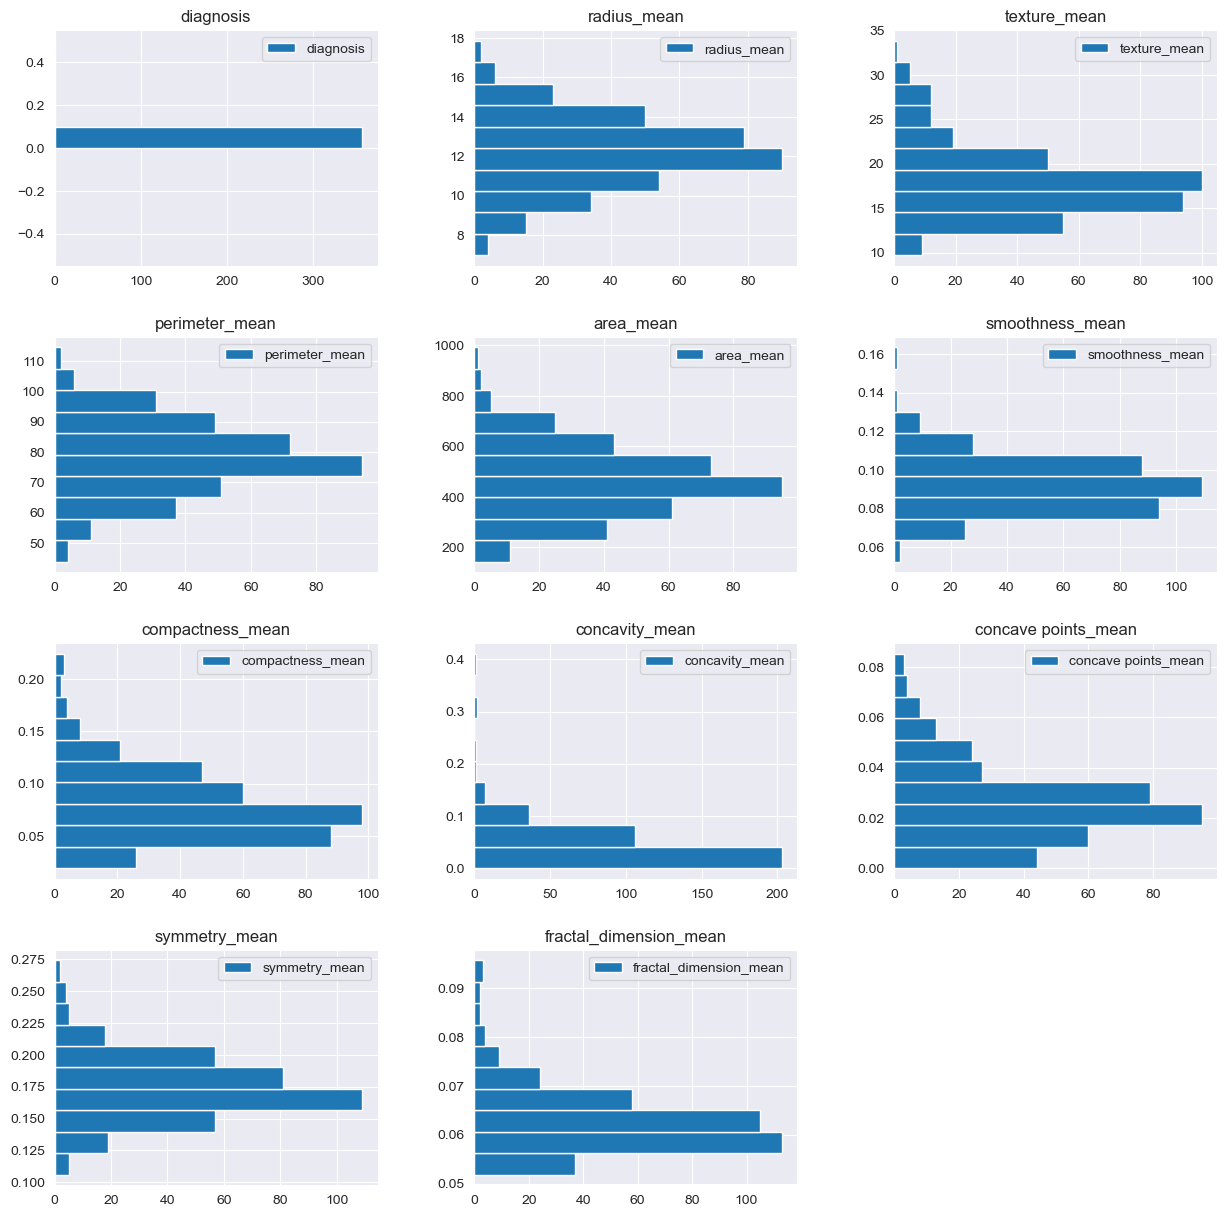

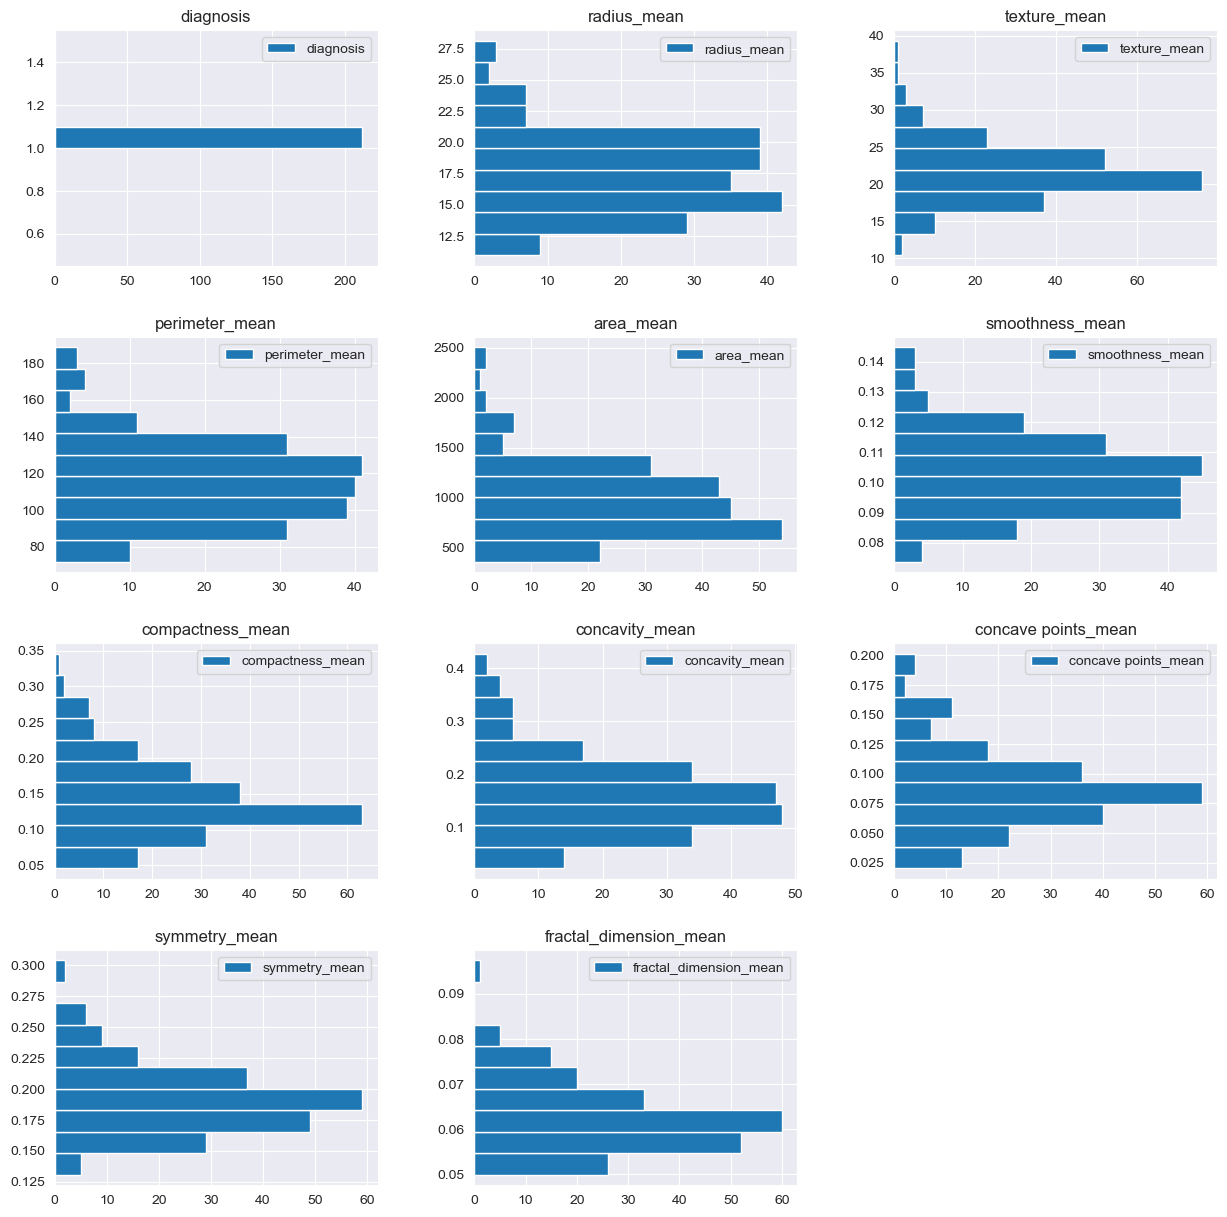

In [7]:
# Finding the correlation between diagnosis and mean columns
# Feature Selection 1
mean_cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Visualization of data using pair plot
sns.pairplot(updated_data[mean_cols], hue="diagnosis")
plt.show()
#Visualization of data using bar chart
updated_data[mean_cols].groupby('diagnosis').hist(orientation='horizontal', legend=True, figsize=(15, 15))

updated_data[mean_cols].corr() # Correlation

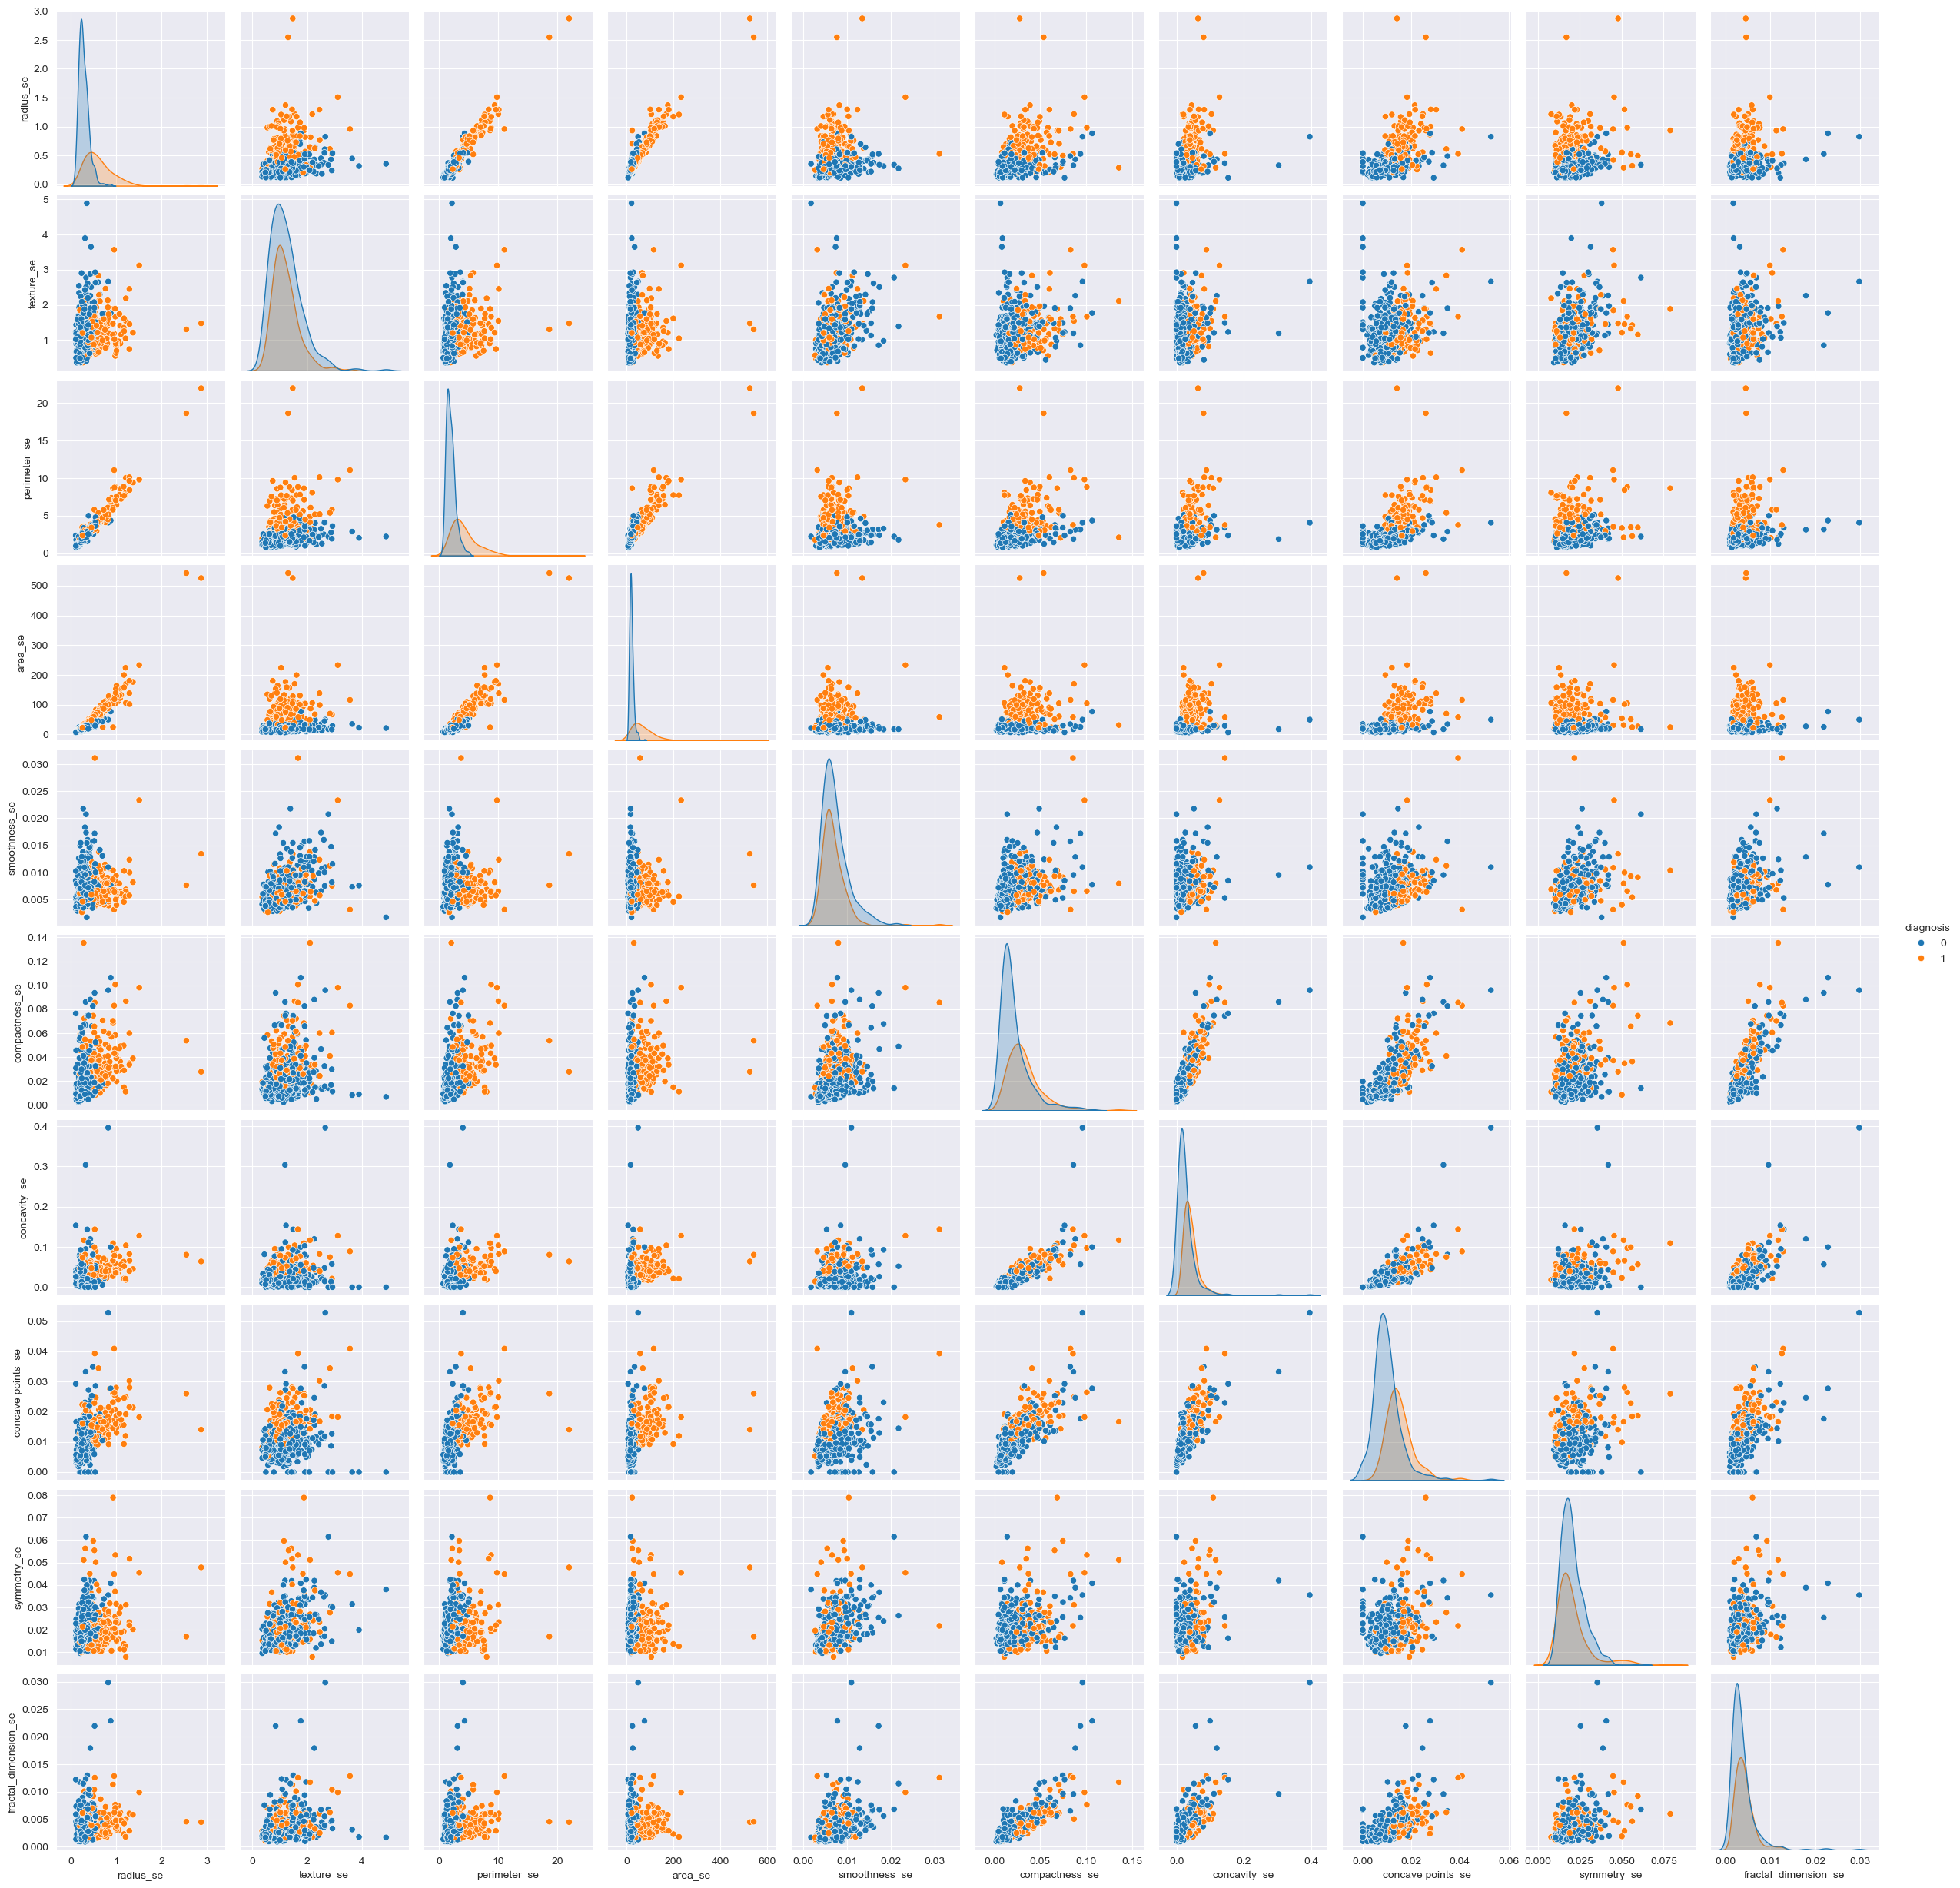

diagnosis  radius_se  texture_se  perimeter_se  \
diagnosis              1.000000   0.567134   -0.008303      0.556141   
radius_se              0.567134   1.000000    0.213247      0.972794   
texture_se            -0.008303   0.213247    1.000000      0.223171   
perimeter_se           0.556141   0.972794    0.223171      1.000000   
area_se                0.540148   0.945070    0.107421      0.928103   
smoothness_se         -0.067016   0.164514    0.397243      0.151075   
compactness_se         0.292999   0.356065    0.231700      0.416322   
concavity_se           0.253730   0.332358    0.194998      0.362482   
concave points_se      0.408042   0.513346    0.230283      0.556264   
symmetry_se           -0.006522   0.240567    0.411621      0.266487   
fractal_dimension_se   0.077972   0.227754    0.279723      0.244143   

                       area_se  smoothness_se  compactness_se  concavity_se  \
diagnosis             0.540148      -0.067016        0.292999      0.253730   
radius_se             0.945070       0.164514        0.356065      0.332358   
texture_se            0.107421       0.397243        0.231700      0.194998   
perimeter_se          0.928103       0.151075        0.416322      0.362482   
area_se               1.000000       0.072999        0.278202      0.262938   
smoothness_se         0.072999       1.000000        0.336696      0.268685   
compactness_se        0.278202       0.336696        1.000000      0.801268   
concavity_se          0.262938       0.268685        0.801268      1.000000   
concave points_se     0.409359       0.328429        0.744083      0.771804   
symmetry_se           0.109783       0.413506        0.394713      0.309429   
fractal_dimension_se  0.124619       0.427374        0.803269      0.727372   

                      concave points_se  symmetry_se  fractal_dimension_se  
diagnosis                      0.408042    -0.006522              0.077972  
radius_se                      0.513346     0.240567              0.227754  
texture_se                     0.230283     0.411621              0.279723  
perimeter_se                   0.556264     0.266487              0.244143  
area_se                        0.409359     0.109783              0.124619  
smoothness_se                  0.328429     0.413506              0.427374  
compactness_se                 0.744083     0.394713              0.803269  
concavity_se                   0.771804     0.309429              0.727372  
concave points_se              1.000000     0.312780              0.611044  
symmetry_se                    0.312780     1.000000              0.369078  
fractal_dimension_se           0.611044     0.369078              1.000000

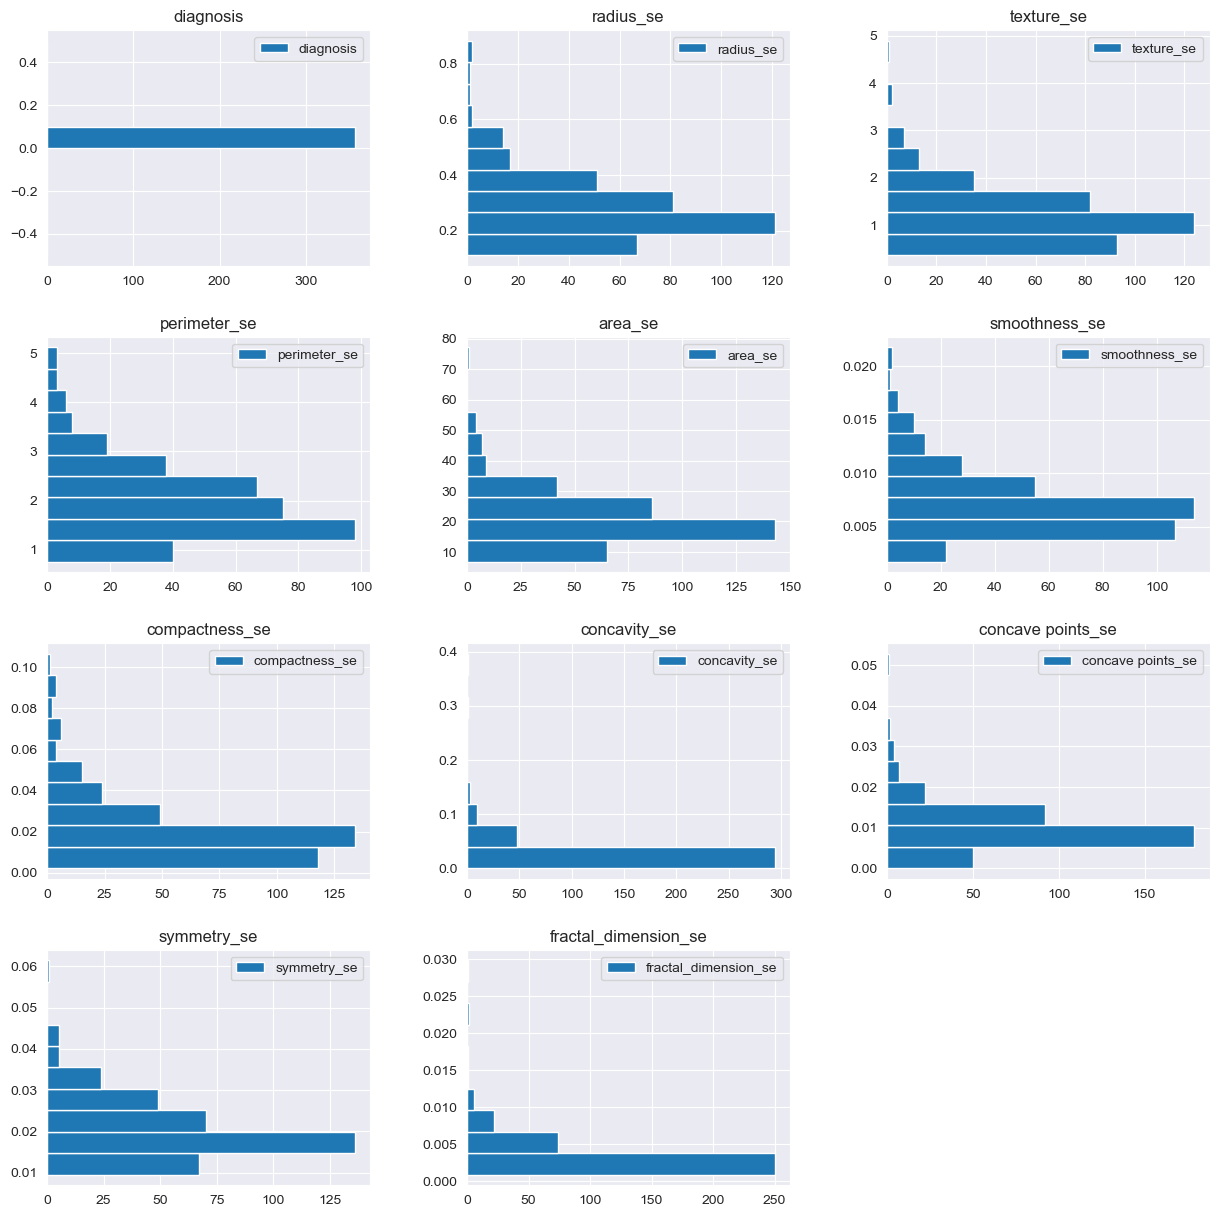

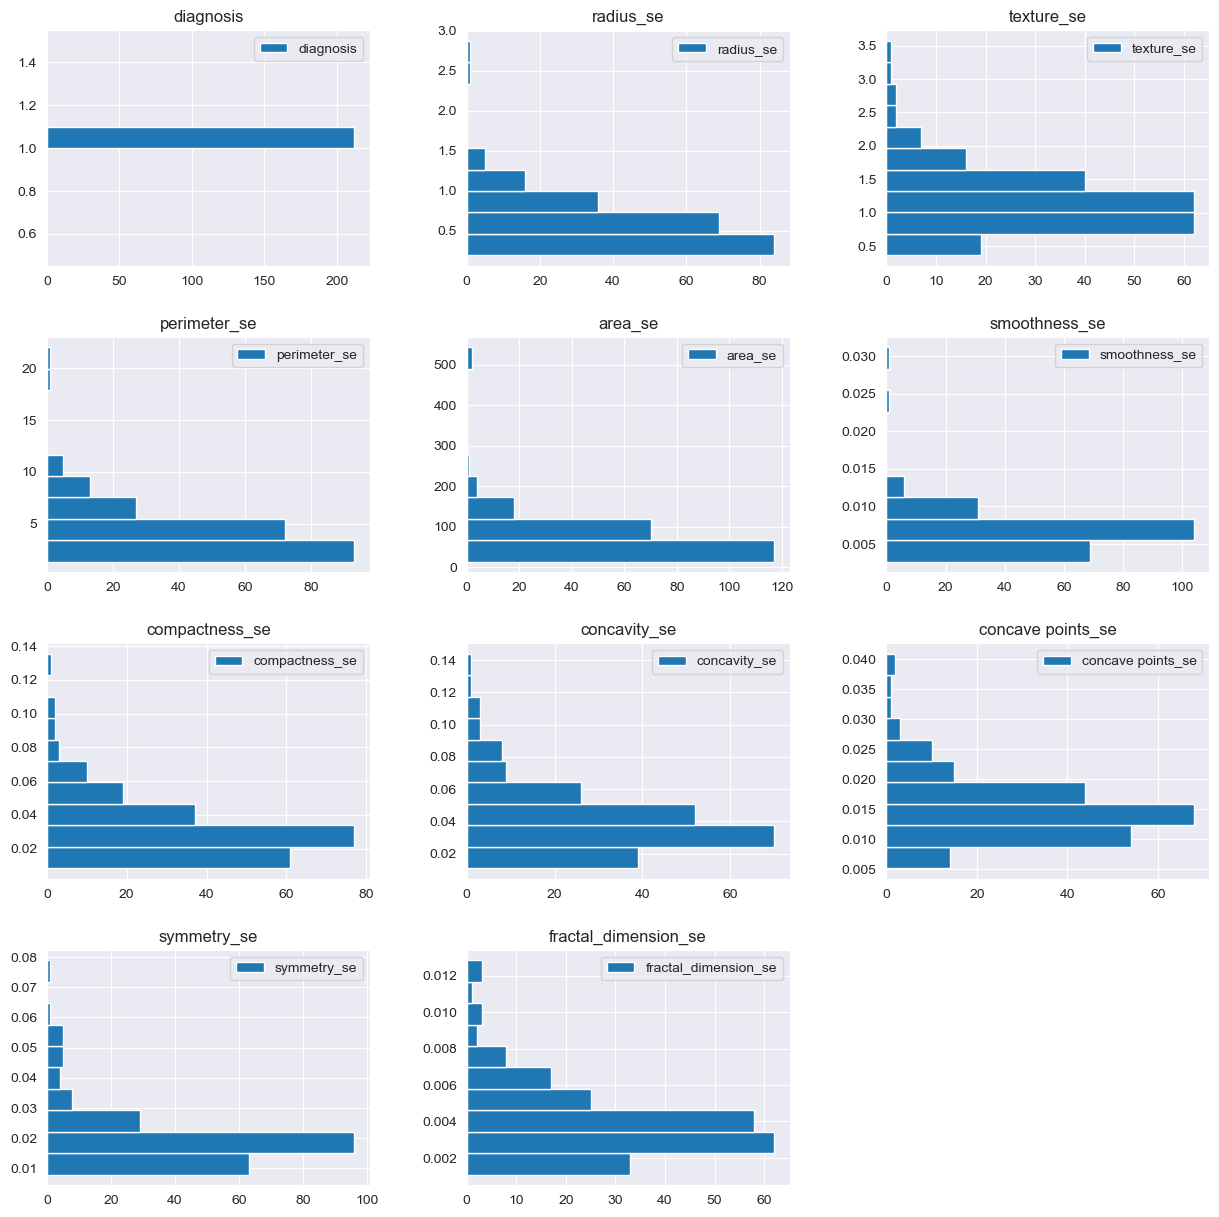

In [8]:
# Finding the correlation between diagnosis and se columns
# Feature Selection 2
se_cols = ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se']

sns.pairplot(updated_data[se_cols], hue="diagnosis") # Visualization
plt.show()

#Visualization of data using bar chart
updated_data[se_cols].groupby('diagnosis').hist(orientation='horizontal', legend=True, figsize=(15, 15))

updated_data[se_cols].corr() # Correlation

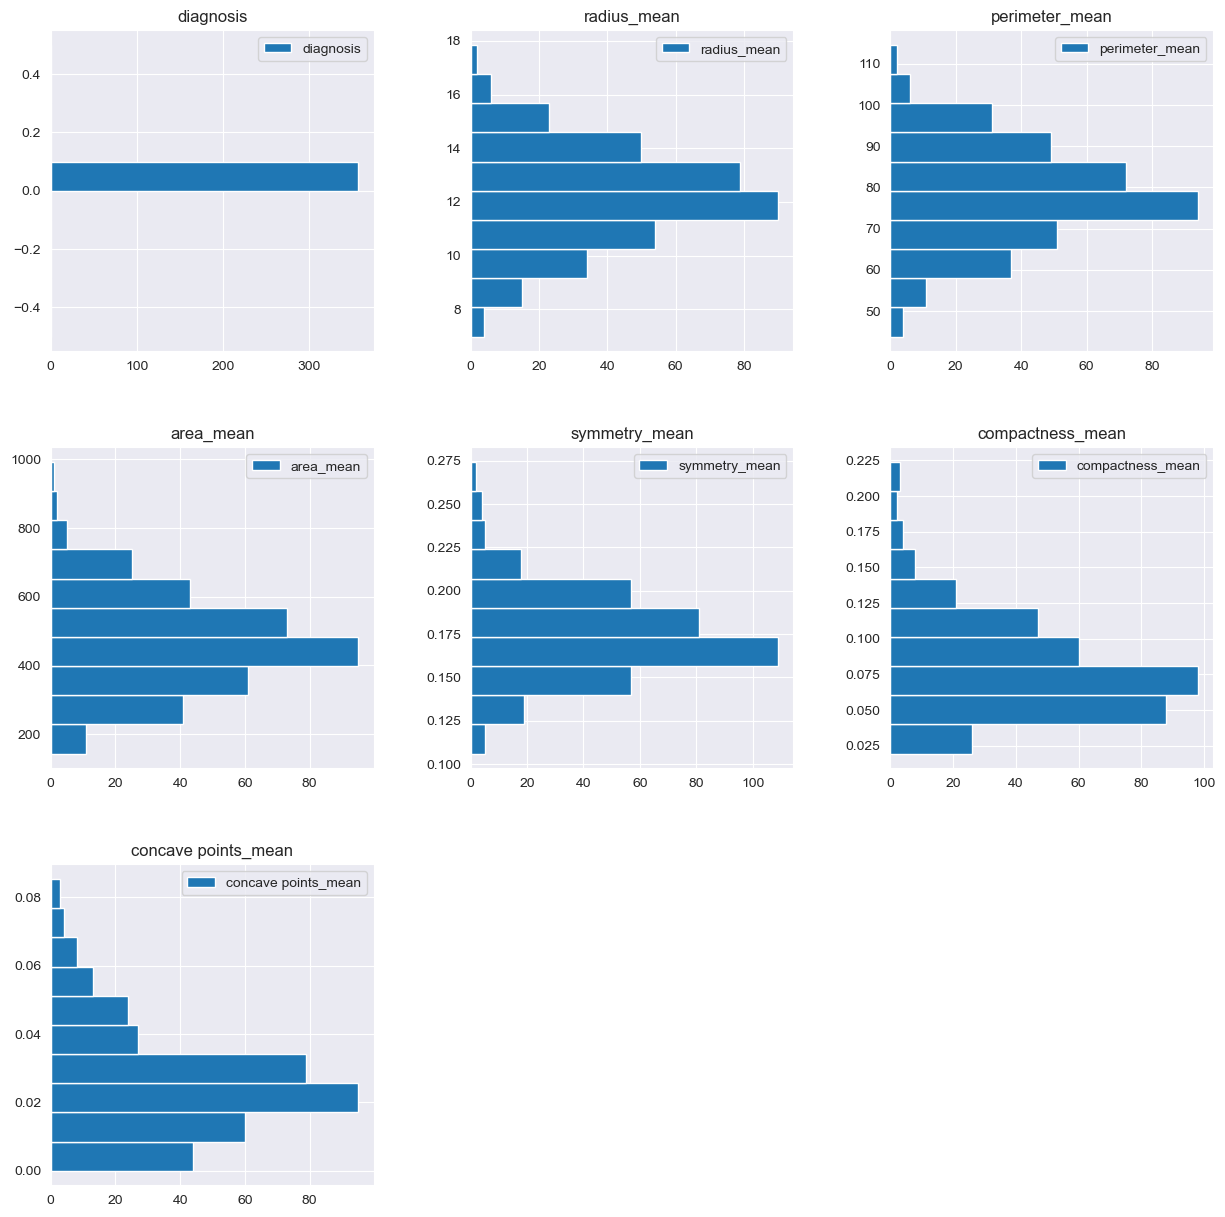

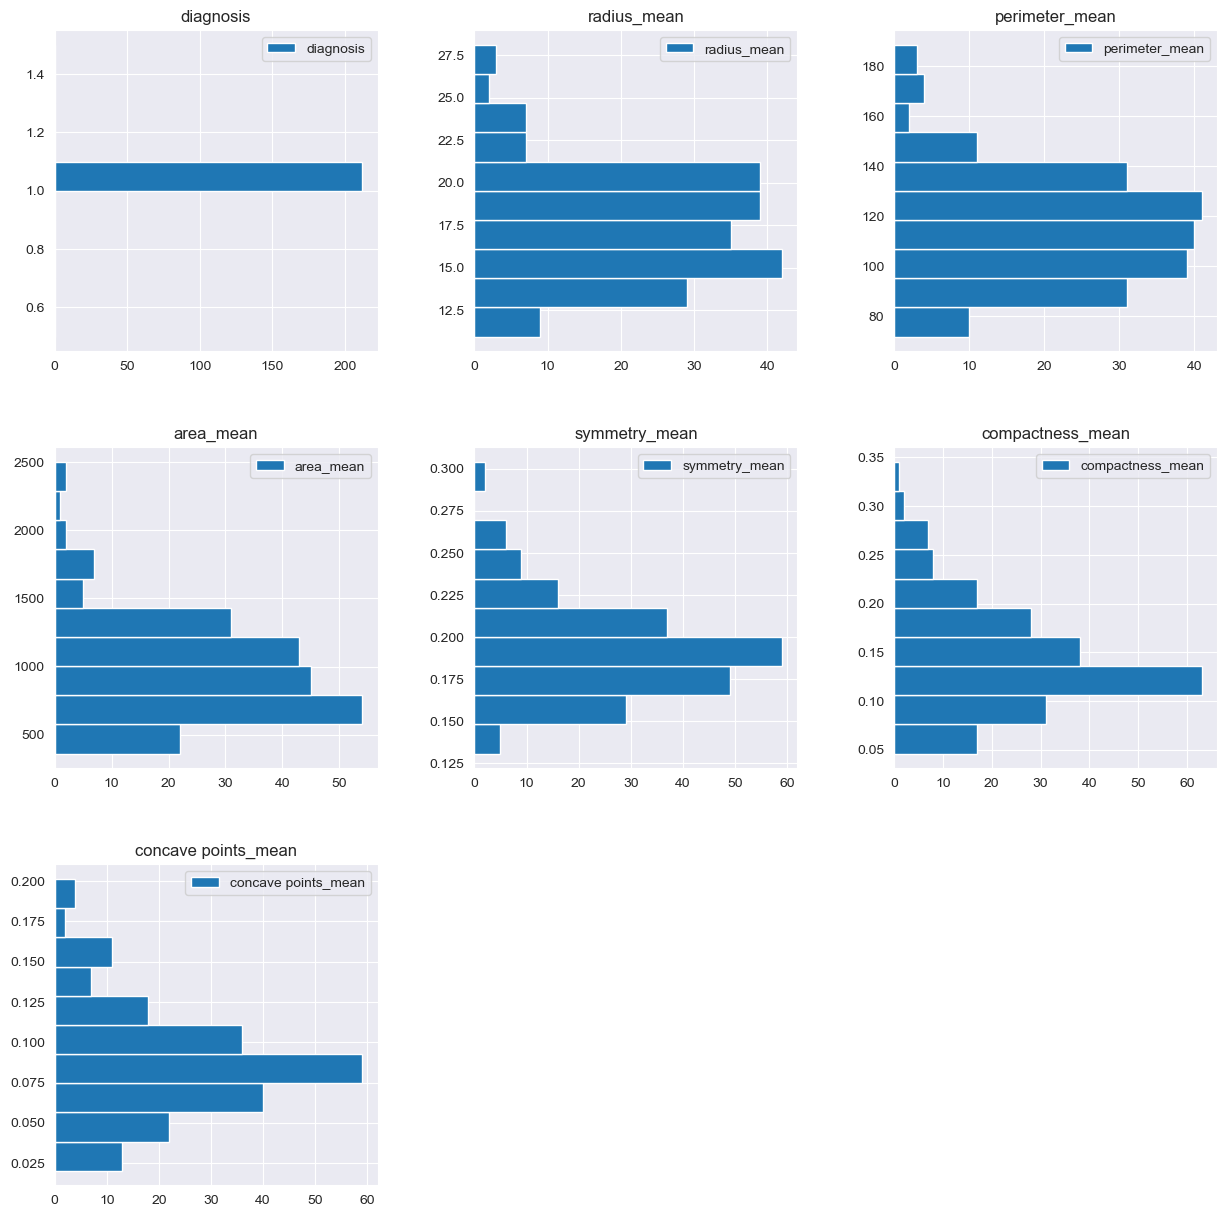

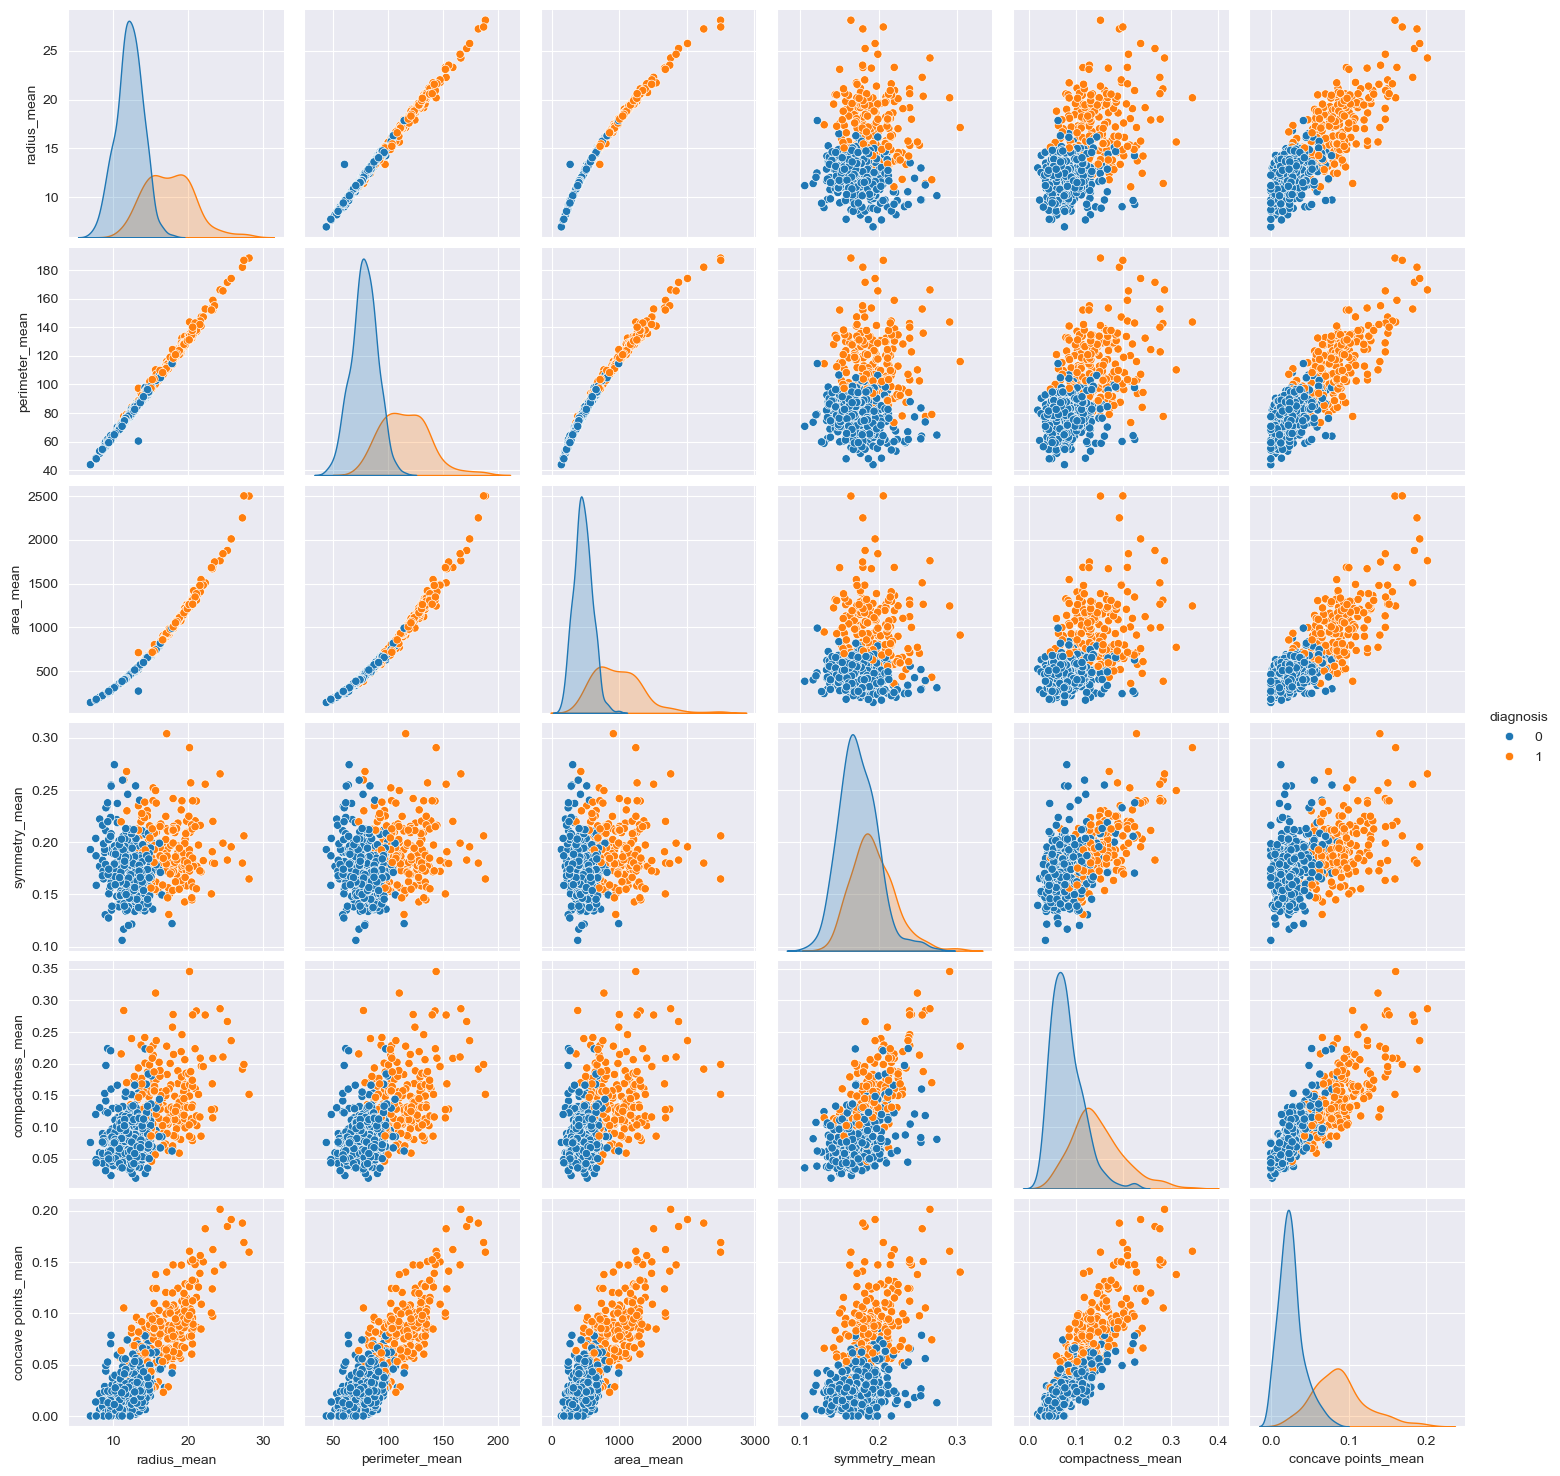

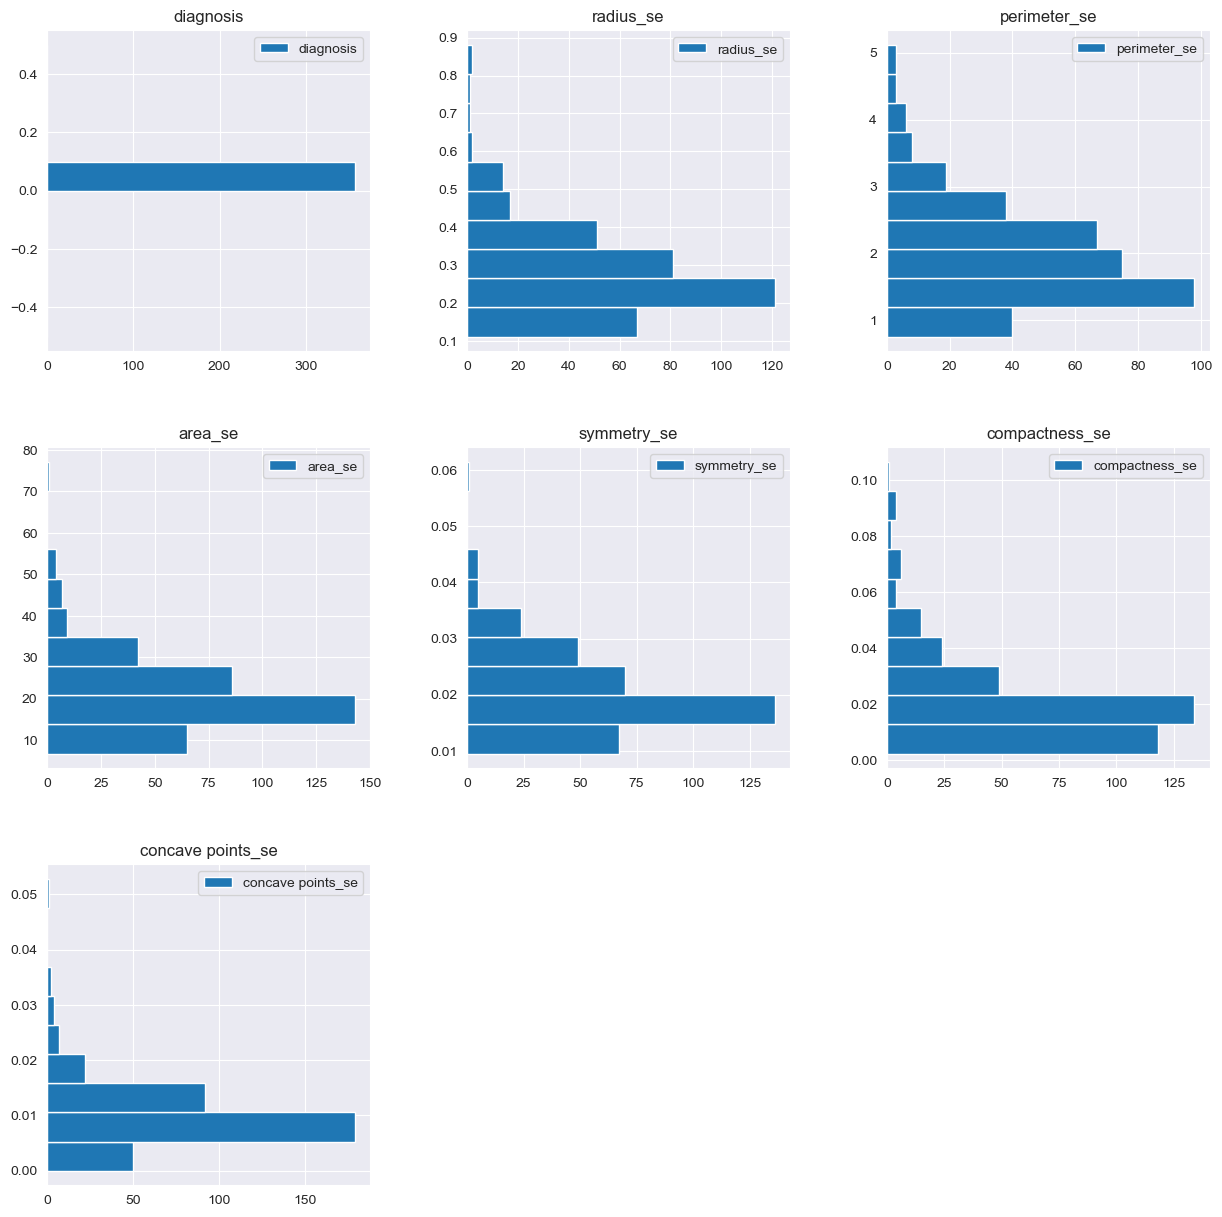

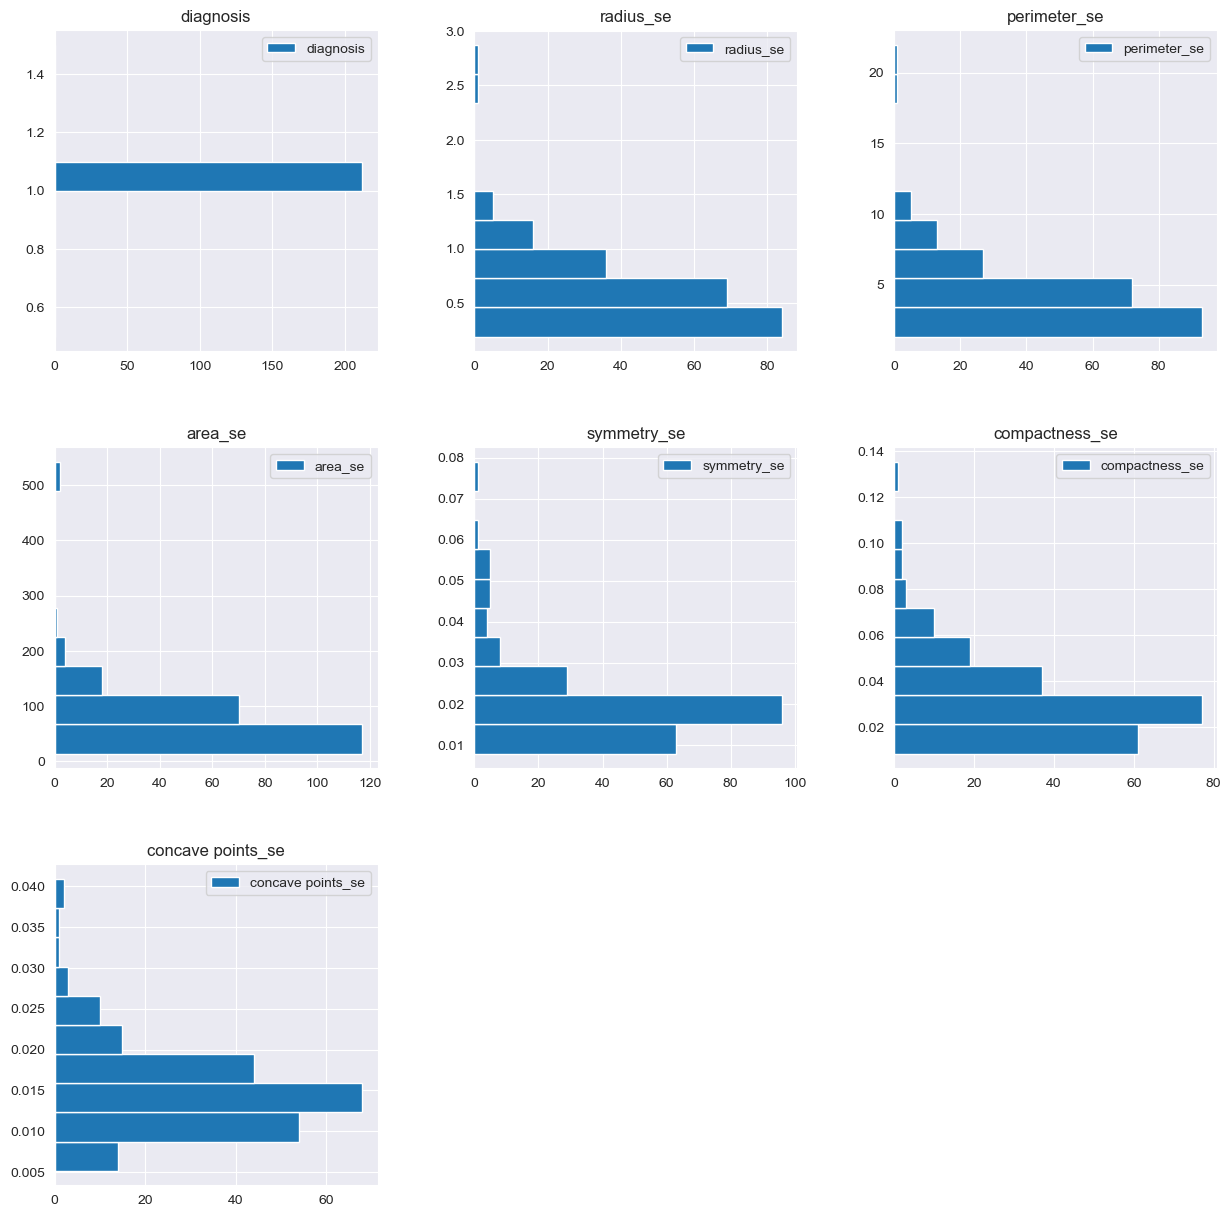

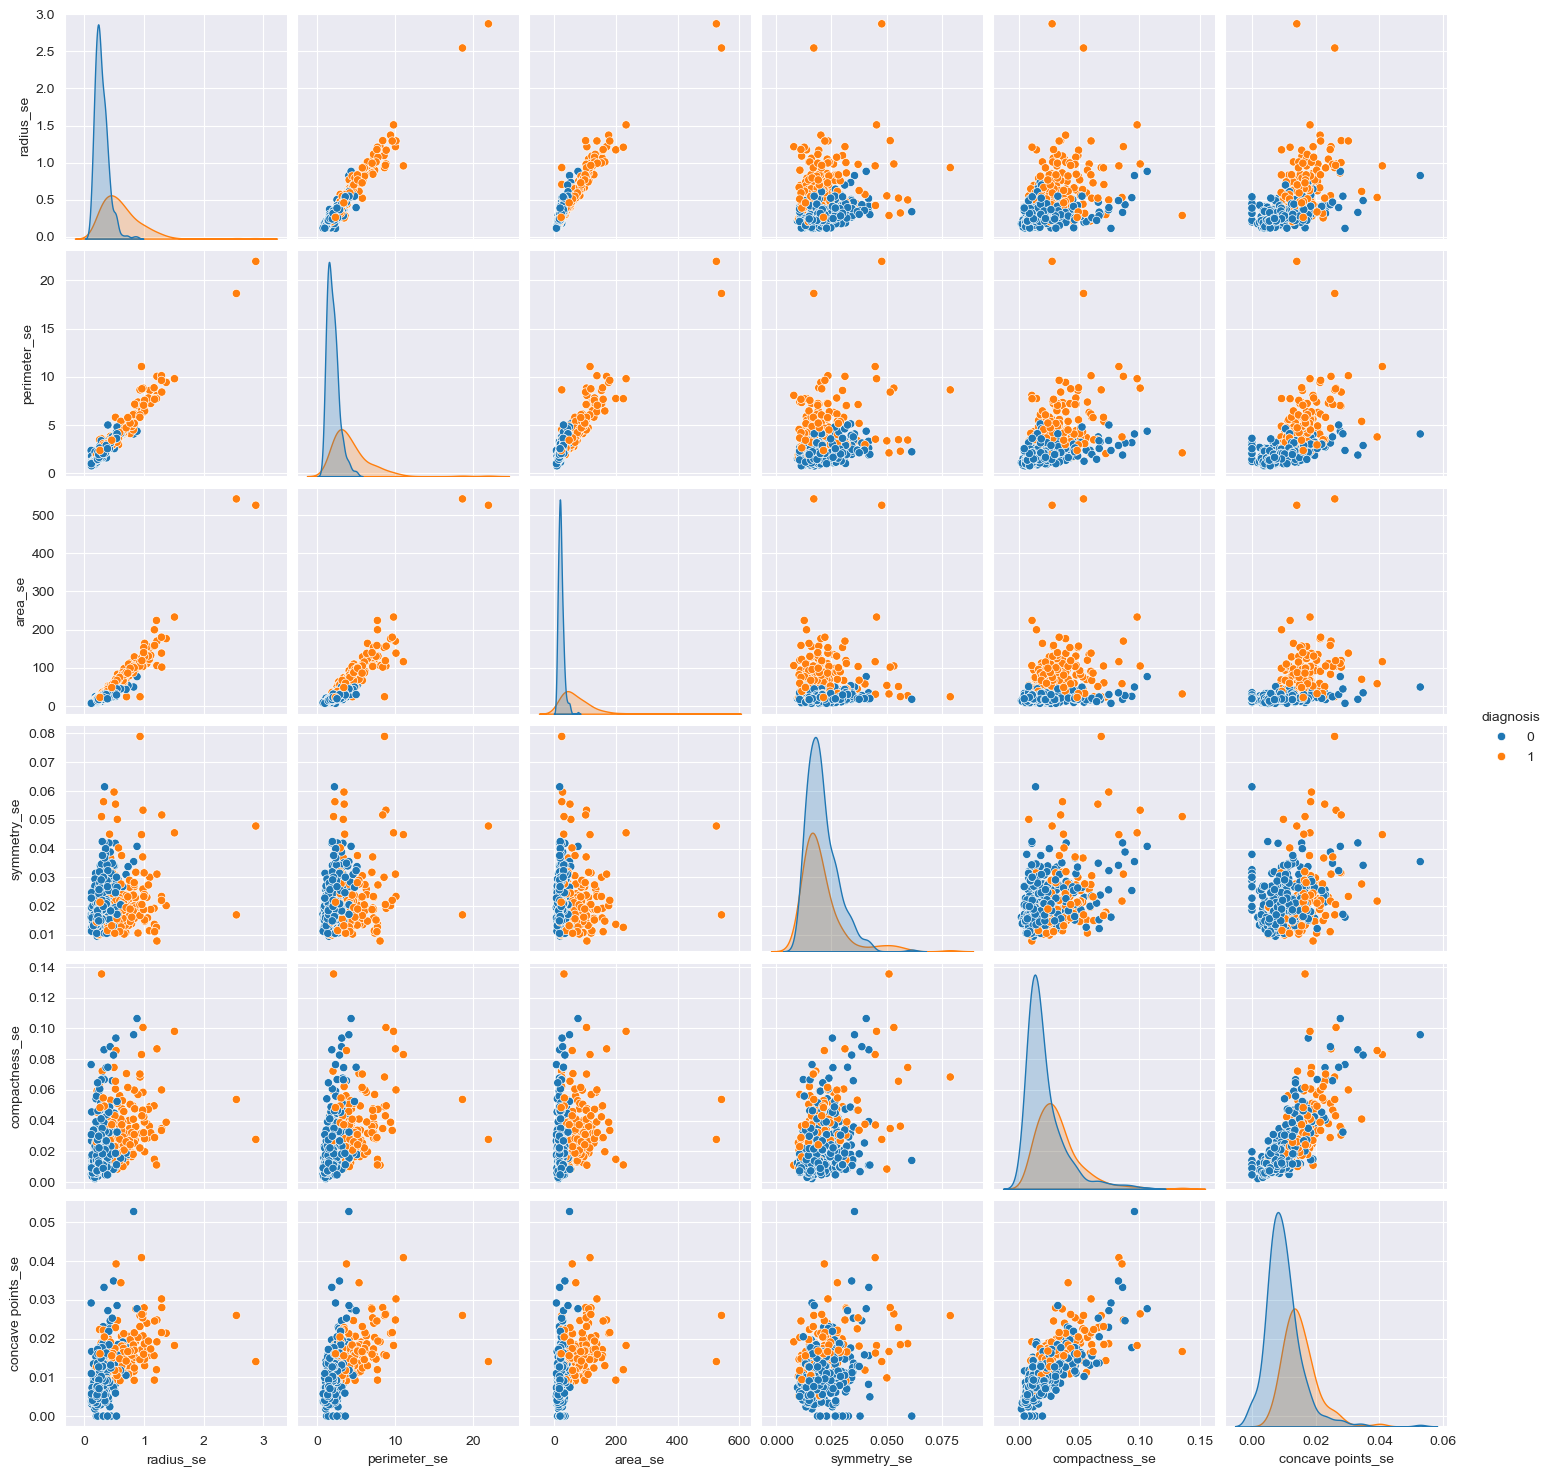

In [9]:
# diagnosis column is identified as targeted feature 
targeted_feature = 'diagnosis'

# Feature Engineering 1
# Choosing the Prediction Columns based on the correlation matrix of mean_cols
prediction_features_one = [ 'radius_mean',  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
overall_features_one = [ 'diagnosis', 'radius_mean',  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']
#Visualization of data by mean columns
updated_data[overall_features_one].groupby('diagnosis').hist(orientation='horizontal', legend=True, figsize=(15, 15))
sns.pairplot(updated_data[overall_features_one], hue="diagnosis") # Visualization
plt.show()

# Feature Engineering 2
# Choosing the Prediction Columns based on the correlation matrix of se_cols
prediction_features_two = [ 'radius_se',  'perimeter_se', 'area_se', 'symmetry_se', 'compactness_se', 'concave points_se']
overall_features_two = [ 'diagnosis', 'radius_se',  'perimeter_se', 'area_se', 'symmetry_se', 'compactness_se', 'concave points_se']
#Visualization of data by standard error columns
updated_data[overall_features_two].groupby('diagnosis').hist(orientation='horizontal', legend=True, figsize=(15, 15))
sns.pairplot(updated_data[overall_features_two], hue="diagnosis") # Visualization
plt.show()



In [10]:
# prediction_features_one columns are set as X for FE1
X_ONE = updated_data[prediction_features_one]

# prediction_features_two columns are set as X for FE2
X_TWO = updated_data[prediction_features_two]

# diagnosis column is set as Y for both FE1 and FE2
Y = updated_data.diagnosis

# importing package to split the data into training data and test data
from sklearn.model_selection import train_test_split

# Splitting dataset into 70% training data and 30% test data
X_ONE_train, X_ONE_test, Y_train, Y_test = train_test_split(X_ONE, Y, test_size=0.3, random_state=15)
X_TWO_train, X_TWO_test, Y_train, Y_test = train_test_split(X_TWO, Y, test_size=0.3, random_state=15)

In [15]:
# importing StandardScaler For Scaling Transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transforming X data of FE1
X_ONE_train = scaler.fit_transform(X_ONE_train)
X_ONE_test = scaler.fit_transform(X_ONE_test)

# Transforming X data of FE2
X_TWO_train = scaler.fit_transform(X_TWO_train)
X_TWO_test = scaler.fit_transform(X_TWO_test)


In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    #Plotting ROC curve(True Positive Rate against False Positive Rate) of each model
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return (score, accuracy, predictions)



ROC curve of 'LogisticRegression(ML1) ' using mean columns (FE1) 



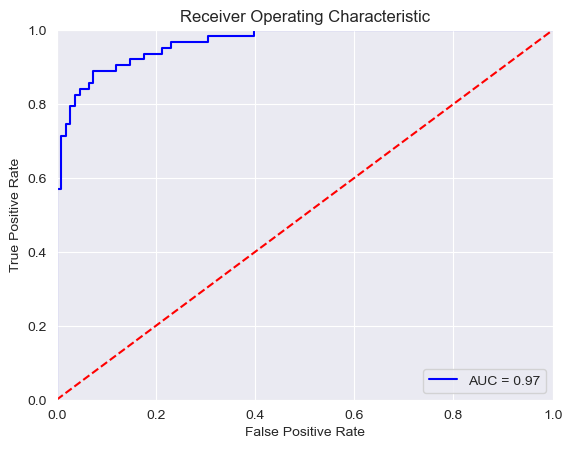



Classification Report of 'LogisticRegression(ML1) ' using mean columns (FE1) 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.90      0.84      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



ROC curve of 'LogisticRegression(ML1) ' using se columns (FE2) 



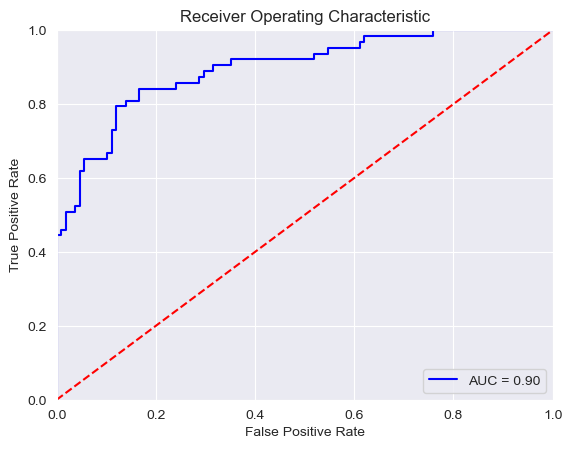



Classification Report of 'LogisticRegression(ML1) ' using se columns (FE2) 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       108
           1       0.79      0.67      0.72        63

    accuracy                           0.81       171
   macro avg       0.81      0.78      0.79       171
weighted avg       0.81      0.81      0.81       171



ROC curve of 'DecisionTreeClassifier(ML2) ' using mean columns (FE1) 



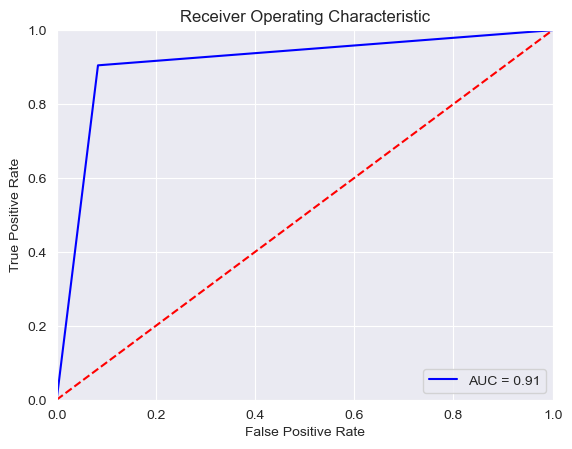



Classification Report of 'DecisionTreeClassifier(ML2) ' using mean columns (FE1) 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       108
           1       0.86      0.90      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



ROC curve of 'DecisionTreeClassifier(ML2) ' using se columns (FE2) 



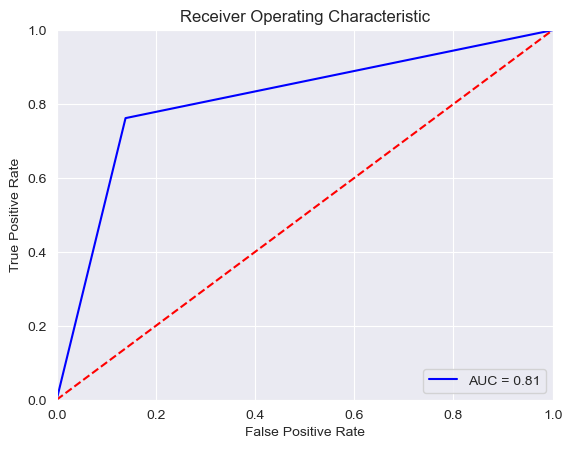



Classification Report of 'DecisionTreeClassifier(ML2) ' using se columns (FE2) 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       108
           1       0.76      0.76      0.76        63

    accuracy                           0.82       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.82      0.82      0.82       171



In [17]:
# importing Machine Learning Techniques
from sklearn.linear_model import LogisticRegression # ML Technique 1
from sklearn.tree import DecisionTreeClassifier     # ML Technique 2

from sklearn.metrics import classification_report

confusion_matrices = []
dataframe_prediction = []
dataframe_prediction_columns = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(['LogisticRegression(ML1)', 'DecisionTreeClassifier(ML2)']), list([LogisticRegression(), DecisionTreeClassifier(criterion='entropy', random_state=0)])):
    
    print("\n\nROC curve of '"+ str(name), "' using mean columns (FE1) \n")
    
    (score, accuracy, predictions) = build_model(model, X_ONE_train, X_ONE_test, Y_train, Y_test )
    
    print("\n\nClassification Report of '"+ str(name), "' using mean columns (FE1) \n")
    
    print(classification_report(Y_test, predictions))

    dataframe_prediction.append([name+"(FE1)", score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Matrices
    confusion_matrices.append(confusion_matrix(Y_test, predictions))
    
    print("\n\nROC curve of '"+ str(name), "' using se columns (FE2) \n")
    
    (score, accuracy, predictions) = build_model(model, X_TWO_train, X_TWO_test, Y_train, Y_test )
    
    print("\n\nClassification Report of '"+ str(name), "' using se columns (FE2) \n")
    
    print(classification_report(Y_test, predictions))

    dataframe_prediction.append([name+"(FE2)", score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Matrices
    confusion_matrices.append(confusion_matrix(Y_test, predictions))
    
        
dataframe_pred = pd.DataFrame(dataframe_prediction, columns=dataframe_prediction_columns)

In [18]:
# Ordering high to low based on accuracy percentage
dataframe_pred.sort_values('accuracy_percentage', ascending=False)

model_name     score  accuracy_score  \
2  DecisionTreeClassifier(ML2)(FE1)  1.000000        0.912281   
0      LogisticRegression(ML1)(FE1)  0.919598        0.906433   
3  DecisionTreeClassifier(ML2)(FE2)  1.000000        0.824561   
1      LogisticRegression(ML1)(FE2)  0.876884        0.812865   

  accuracy_percentage  
2              91.23%  
0              90.64%  
3              82.46%  
1              81.29%

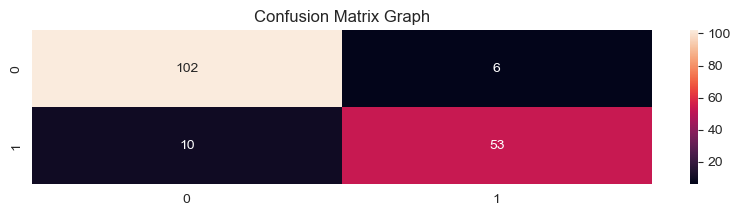

<Figure size 640x480 with 0 Axes>

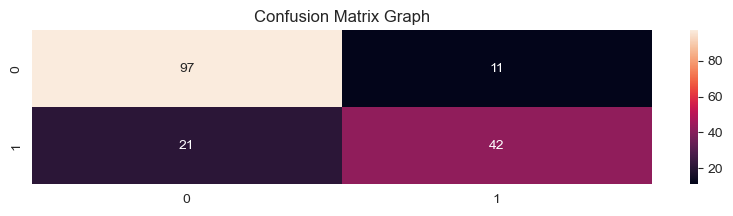

<Figure size 640x480 with 0 Axes>

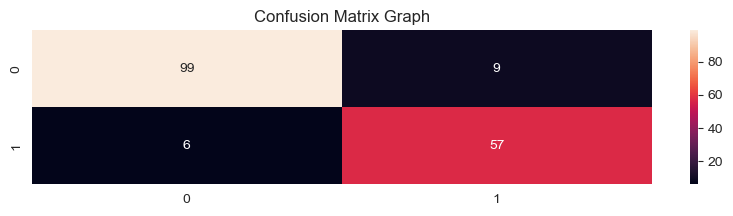

<Figure size 640x480 with 0 Axes>

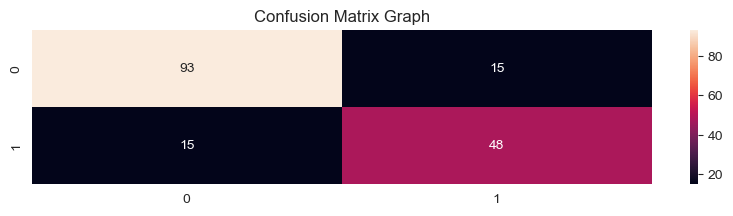

<Figure size 640x480 with 0 Axes>

In [19]:
# Plotting the confusion matrices
for confusion_matrix in confusion_matrices:
    plt.figure(figsize=(10, 2))
    plt.title("Confusion Matrix Graph")
    # Show The Matrices Graph    
    sns.heatmap(confusion_matrix, annot=True, fmt="d")
    plt.show()
    plt.tight_layout(pad=True)